In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
 
df0 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/0.csv")
df0 = df0.drop(df0.columns[0], axis=1)  

df1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/1.csv")
df1 = df1.drop(df1.columns[0], axis=1)  

df2 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/2.csv")
df2 = df2.drop(df2.columns[0], axis=1)  

df3 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/3.csv")
df3 = df3.drop(df3.columns[0], axis=1)  

df4 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/final/final_ir/4.csv")
df4 = df4.drop(df4.columns[0], axis=1)  

d0 = np.array(df0)
d1 = np.array(df1)
d2 = np.array(df2)
d3 = np.array(df3)
d4 = np.array(df4)

In [6]:
X_train = []
Y_train = []

for i in range(2000):
  X_train.append(d1[i])
  Y_train.append(1)

for i in range(500):
  X_train.append(d0[i])
  Y_train.append(0)

  X_train.append(d2[i])
  Y_train.append(0)

  X_train.append(d3[i])
  Y_train.append(0)

  X_train.append(d4[i])
  Y_train.append(0)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_test = []
Y_test = []

for i in range(500):
  X_test.append(d1[2000+i])
  Y_test.append(1)

for i in range(125):
  X_test.append(d0[500+i])
  Y_test.append(0)

  X_test.append(d2[500+i])
  Y_test.append(0)

  X_test.append(d3[500+i])
  Y_test.append(0)

  X_test.append(d4[500+i])
  Y_test.append(0)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [13]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [14]:
est = RandomForestClassifier(n_jobs=-1)

rf_hpr = {
    'max_depth': [3, 5, 10, None],
    'criterion' : ['gini','entropy'],
    'bootstrap' : [True,False],
    
}

In [15]:
def hypertuning_rscv(est,rf_hpr,nbr_iter,X,Y):
  rdmsearch = RandomizedSearchCV(est,
                                 param_distributions=rf_hpr,
                                 scoring='accuracy',
                                 n_iter=nbr_iter,
                                 n_jobs=-1,
                                 cv=5)
  rdmsearch.fit(X,Y)
  ht_params = rdmsearch.best_params_
  ht_score = rdmsearch.best_score_
  
  return ht_params,ht_score

In [16]:
rf_param, rf_score = hypertuning_rscv(est,rf_hpr,100,X_train,Y_train)

In [17]:
rf_param

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}

In [45]:
rfc = RandomForestClassifier(n_jobs=-1,
                             criterion='entropy',
                             max_depth=None,
                             n_estimators=10,
                             bootstrap=False)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=10,
                       n_jobs=-1)

In [46]:
Y_pred_train = rfc.predict(X_train)
Y_pred_test = rfc.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.66      0.76      0.70       500
           1       0.72      0.60      0.65       500

    accuracy                           0.68      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.69      0.68      0.68      1000



Train CM


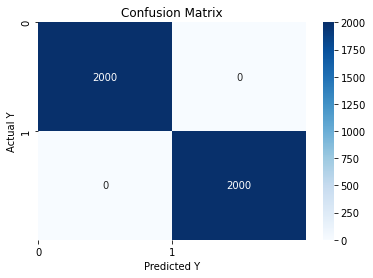





Test CM


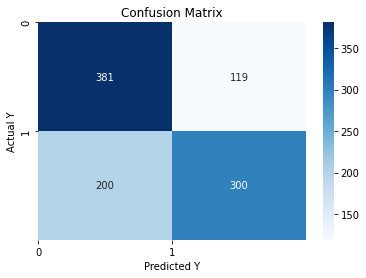

In [47]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()